k-NN CLASSIFICATION PROBLEM

Dataset points:
  A = (1, 4) (Group 1)
  B = (2, 4) (Group 1)
  C = (6, 5) (Group 2)
  D = (7, 6) (Group 2)
  E = (9, 1) (Group 1)

Query point q = (5, 4)
k = 3

(a) EUCLIDEAN DISTANCE
d(q, A) = √[(5-1)² + (4-4)²] = √[16 + 0] = 4.0000
d(q, B) = √[(5-2)² + (4-4)²] = √[9 + 0] = 3.0000
d(q, C) = √[(5-6)² + (4-5)²] = √[1 + 1] = 1.4142
d(q, D) = √[(5-7)² + (4-6)²] = √[4 + 4] = 2.8284
d(q, E) = √[(5-9)² + (4-1)²] = √[16 + 9] = 5.0000

Sorted distances (Euclidean):
  1. C: 1.4142 (Group 2)
  2. D: 2.8284 (Group 2)
  3. B: 3.0000 (Group 1)
  4. A: 4.0000 (Group 1)
  5. E: 5.0000 (Group 1)

Three nearest neighbors: C, D, B

(b) CLASSIFICATION WITH EUCLIDEAN DISTANCE

Voting from 3 nearest neighbors:
  C (distance: 1.4142) → Group 2
  D (distance: 2.8284) → Group 2
  B (distance: 3.0000) → Group 1

Vote count:
  Group 1: 1 votes
  Group 2: 2 votes

→ Query point q is classified as: GROUP 2

(c) MANHATTAN (L1) DISTANCE
d(q, A) = |5-1| + |4-4| = 4 + 0 = 4.0000
d(q, B) 

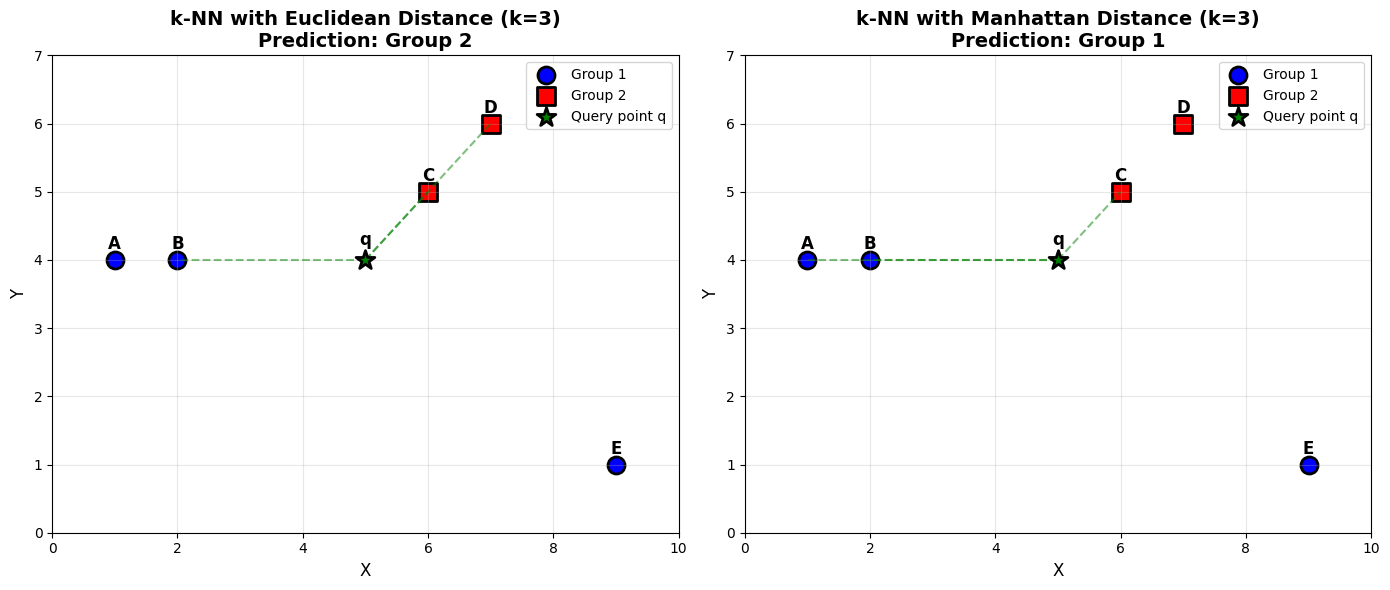


Visualization saved as 'knn_classification.png' in current directory


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
points = {"A": (1, 4), "B": (2, 4), "C": (6, 5), "D": (7, 6), "E": (9, 1)}

# Define groups
group_1 = ["A", "B", "E"]
group_2 = ["C", "D"]

# Query point
q = (5, 4)

# k value
k = 3

print("=" * 60)
print("k-NN CLASSIFICATION PROBLEM")
print("=" * 60)
print(f"\nDataset points:")
for name, coord in points.items():
    group = 1 if name in group_1 else 2
    print(f"  {name} = {coord} (Group {group})")
print(f"\nQuery point q = {q}")
print(f"k = {k}")

# Part (a): Euclidean distance
print("\n" + "=" * 60)
print("(a) EUCLIDEAN DISTANCE")
print("=" * 60)

euclidean_distances = {}
for name, coord in points.items():
    distance = np.sqrt((q[0] - coord[0]) ** 2 + (q[1] - coord[1]) ** 2)
    euclidean_distances[name] = distance
    print(
        f"d(q, {name}) = √[(5-{coord[0]})² + (4-{coord[1]})²] = √[{(q[0] - coord[0]) ** 2} + {(q[1] - coord[1]) ** 2}] = {distance:.4f}"
    )

# Sort by distance
sorted_euclidean = sorted(euclidean_distances.items(), key=lambda x: x[1])
print(f"\nSorted distances (Euclidean):")
for i, (name, dist) in enumerate(sorted_euclidean, 1):
    group = 1 if name in group_1 else 2
    print(f"  {i}. {name}: {dist:.4f} (Group {group})")

print(
    f"\nThree nearest neighbors: {', '.join([name for name, _ in sorted_euclidean[:k]])}"
)

# Part (b): Majority vote with Euclidean
print("\n" + "=" * 60)
print("(b) CLASSIFICATION WITH EUCLIDEAN DISTANCE")
print("=" * 60)

nearest_k_euclidean = sorted_euclidean[:k]
votes_euclidean = {"Group 1": 0, "Group 2": 0}

print(f"\nVoting from {k} nearest neighbors:")
for name, dist in nearest_k_euclidean:
    if name in group_1:
        votes_euclidean["Group 1"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 1")
    else:
        votes_euclidean["Group 2"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 2")

print(f"\nVote count:")
print(f"  Group 1: {votes_euclidean['Group 1']} votes")
print(f"  Group 2: {votes_euclidean['Group 2']} votes")

predicted_group_euclidean = (
    1 if votes_euclidean["Group 1"] > votes_euclidean["Group 2"] else 2
)
print(f"\n→ Query point q is classified as: GROUP {predicted_group_euclidean}")

# Part (c): Manhattan distance
print("\n" + "=" * 60)
print("(c) MANHATTAN (L1) DISTANCE")
print("=" * 60)

manhattan_distances = {}
for name, coord in points.items():
    distance = abs(q[0] - coord[0]) + abs(q[1] - coord[1])
    manhattan_distances[name] = distance
    print(
        f"d(q, {name}) = |5-{coord[0]}| + |4-{coord[1]}| = {abs(q[0] - coord[0])} + {abs(q[1] - coord[1])} = {distance:.4f}"
    )

# Sort by distance
sorted_manhattan = sorted(manhattan_distances.items(), key=lambda x: x[1])
print(f"\nSorted distances (Manhattan):")
for i, (name, dist) in enumerate(sorted_manhattan, 1):
    group = 1 if name in group_1 else 2
    print(f"  {i}. {name}: {dist:.4f} (Group {group})")

print(
    f"\nThree nearest neighbors: {', '.join([name for name, _ in sorted_manhattan[:k]])}"
)

# Majority vote with Manhattan
nearest_k_manhattan = sorted_manhattan[:k]
votes_manhattan = {"Group 1": 0, "Group 2": 0}

print(f"\nVoting from {k} nearest neighbors:")
for name, dist in nearest_k_manhattan:
    if name in group_1:
        votes_manhattan["Group 1"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 1")
    else:
        votes_manhattan["Group 2"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 2")

print(f"\nVote count:")
print(f"  Group 1: {votes_manhattan['Group 1']} votes")
print(f"  Group 2: {votes_manhattan['Group 2']} votes")

predicted_group_manhattan = (
    1 if votes_manhattan["Group 1"] > votes_manhattan["Group 2"] else 2
)
print(f"\n→ Query point q is classified as: GROUP {predicted_group_manhattan}")

# Compare results
print("\n" + "=" * 60)
print("COMPARISON")
print("=" * 60)
print(f"\nEuclidean distance classification: Group {predicted_group_euclidean}")
print(f"Manhattan distance classification: Group {predicted_group_manhattan}")

if predicted_group_euclidean == predicted_group_manhattan:
    print("\n→ The result DOES NOT change when using Manhattan distance.")
else:
    print("\n→ The result CHANGES when using Manhattan distance!")

# Visualization
print("\n" + "=" * 60)
print("GENERATING VISUALIZATION...")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Euclidean
for name, coord in points.items():
    if name in group_1:
        ax1.scatter(
            coord[0],
            coord[1],
            c="blue",
            s=150,
            marker="o",
            edgecolors="black",
            linewidth=2,
            label="Group 1" if name == "A" else "",
        )
    else:
        ax1.scatter(
            coord[0],
            coord[1],
            c="red",
            s=150,
            marker="s",
            edgecolors="black",
            linewidth=2,
            label="Group 2" if name == "C" else "",
        )
    ax1.annotate(
        name,
        coord,
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax1.scatter(
    q[0],
    q[1],
    c="green",
    s=200,
    marker="*",
    edgecolors="black",
    linewidth=2,
    label="Query point q",
    zorder=5,
)
ax1.annotate(
    "q",
    q,
    fontsize=12,
    fontweight="bold",
    ha="center",
    va="bottom",
    xytext=(0, 8),
    textcoords="offset points",
)

# Draw circles to k nearest neighbors (Euclidean)
for name, _ in nearest_k_euclidean:
    coord = points[name]
    ax1.plot([q[0], coord[0]], [q[1], coord[1]], "g--", alpha=0.5, linewidth=1.5)

ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("Y", fontsize=12)
ax1.set_title(
    f"k-NN with Euclidean Distance (k={k})\nPrediction: Group {predicted_group_euclidean}",
    fontsize=14,
    fontweight="bold",
)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="best")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 7)

# Plot for Manhattan
for name, coord in points.items():
    if name in group_1:
        ax2.scatter(
            coord[0],
            coord[1],
            c="blue",
            s=150,
            marker="o",
            edgecolors="black",
            linewidth=2,
            label="Group 1" if name == "A" else "",
        )
    else:
        ax2.scatter(
            coord[0],
            coord[1],
            c="red",
            s=150,
            marker="s",
            edgecolors="black",
            linewidth=2,
            label="Group 2" if name == "C" else "",
        )
    ax2.annotate(
        name,
        coord,
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax2.scatter(
    q[0],
    q[1],
    c="green",
    s=200,
    marker="*",
    edgecolors="black",
    linewidth=2,
    label="Query point q",
    zorder=5,
)
ax2.annotate(
    "q",
    q,
    fontsize=12,
    fontweight="bold",
    ha="center",
    va="bottom",
    xytext=(0, 8),
    textcoords="offset points",
)

# Draw lines to k nearest neighbors (Manhattan)
for name, _ in nearest_k_manhattan:
    coord = points[name]
    ax2.plot([q[0], coord[0]], [q[1], coord[1]], "g--", alpha=0.5, linewidth=1.5)

ax2.set_xlabel("X", fontsize=12)
ax2.set_ylabel("Y", fontsize=12)
ax2.set_title(
    f"k-NN with Manhattan Distance (k={k})\nPrediction: Group {predicted_group_manhattan}",
    fontsize=14,
    fontweight="bold",
)
ax2.grid(True, alpha=0.3)
ax2.legend(loc="best")
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 7)

plt.tight_layout()
plt.savefig("knn_classification.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nVisualization saved as 'knn_classification.png' in current directory")
